In [36]:
!pip install pandas
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/3c/a5/54a497ca4af8e76adfe7c5a1712f3bb6b2222d464fe736b60aaafd425945/matplotlib-3.9.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c8/e1/059700c154bd7170d1c37061239836d2e51ff608f4


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('./nats/6k_data_notifications.csv')
print(df.head())
print(len(df))

                        _id      createdAt  receivedByConsumerAt  \
0  66a5166b0820aa459ea252e4  1722095211480         1722095211474   
1  66a5166c0820aa459ea252e5  1722095212097         1722095212088   
2  66a5166c0820aa459ea252e6  1722095212113         1722095212108   
3  66a5166c0820aa459ea252e7  1722095212125         1722095212121   
4  66a5166c0820aa459ea252e8  1722095212135         1722095212131   

   sentFromBrokerAt  updatedAt  
0     1722095211460          0  
1     1722095211470          0  
2     1722095211470          0  
3     1722095211476          0  
4     1722095211476          0  
5786761


In [5]:
# Convert columns to integer type if needed
df['receivedByConsumerAt'] = pd.to_numeric(df['receivedByConsumerAt'], errors='coerce')
df['sentFromBrokerAt'] = pd.to_numeric(df['sentFromBrokerAt'], errors='coerce')

In [6]:
df['e2eLatency'] = df['receivedByConsumerAt'] - df['sentFromBrokerAt']

In [7]:
print(df.head())

                        _id      createdAt  receivedByConsumerAt  \
0  66a5166b0820aa459ea252e4  1722095211480         1722095211474   
1  66a5166c0820aa459ea252e5  1722095212097         1722095212088   
2  66a5166c0820aa459ea252e6  1722095212113         1722095212108   
3  66a5166c0820aa459ea252e7  1722095212125         1722095212121   
4  66a5166c0820aa459ea252e8  1722095212135         1722095212131   

   sentFromBrokerAt  updatedAt  e2eLatency  
0     1722095211460          0          14  
1     1722095211470          0         618  
2     1722095211470          0         638  
3     1722095211476          0         645  
4     1722095211476          0         655  


In [10]:
df.to_csv('data_6k_nats_with_latency.csv', index=False)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_sorted = df.sort_values(by='e2eLatency').reset_index(drop=True)

percentiles = df_sorted['e2eLatency'].quantile([0.50, 0.70, 0.90, 0.95, 0.99])
print(percentiles)

0.50    4427779.0
0.70    5767660.0
0.90    6975409.0
0.95    7276836.0
0.99    7555790.0
Name: e2eLatency, dtype: float64


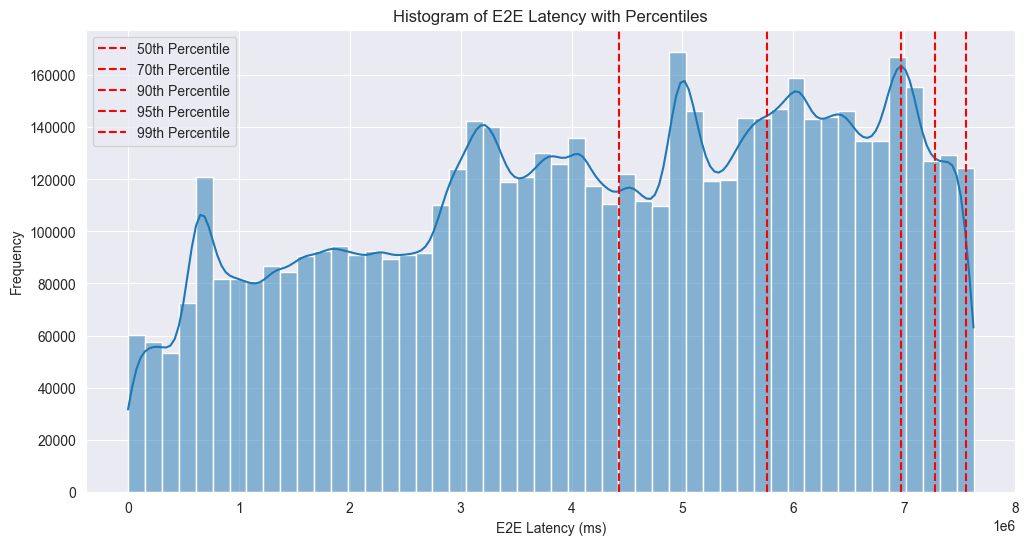

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['e2eLatency'], bins=50, kde=True)

# Tambahkan garis vertikal untuk persentil
for p in [0.50, 0.70, 0.90, 0.95, 0.99]:
    plt.axvline(percentiles[p], color='r', linestyle='--', label=f'{int(p*100)}th Percentile')

plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())

plt.title('Histogram of E2E Latency with Percentiles')
plt.xlabel('E2E Latency (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

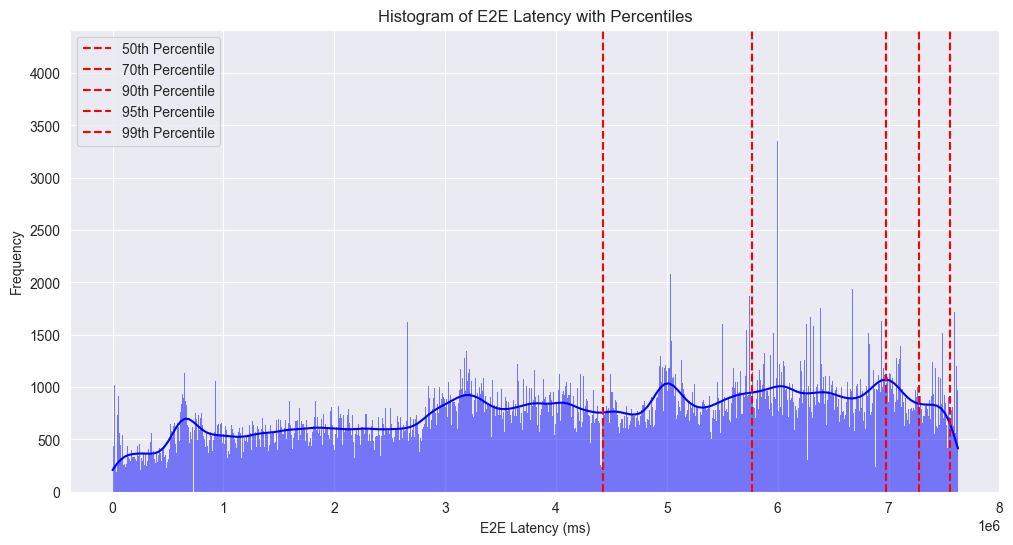

In [14]:
# Tentukan rentang bin
min_latency = df_sorted['e2eLatency'].min()
max_latency = df_sorted['e2eLatency'].max()
bin_range = range(int(min_latency), int(max_latency) + 1000, 1000)

# Visualisasikan histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['e2eLatency'], bins=bin_range, kde=True, color='blue')

# Tambahkan garis vertikal untuk persentil
for p in [0.50, 0.70, 0.90, 0.95, 0.99]:
    plt.axvline(percentiles[p], color='r', linestyle='--', label=f'{int(p*100)}th Percentile')

plt.title('Histogram of E2E Latency with Percentiles')
plt.xlabel('E2E Latency (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
start_time_ms = 1722095209429
end_time_ms = 1722133260015
data_received_mongo = 5786761  
#data_received_postgres = 5786802 
#data_loss_nats = 41

# Hitung total waktu pengujian dalam milidetik
total_time_ms = end_time_ms - start_time_ms

# Konversi total waktu ke detik
total_time_seconds = total_time_ms / 1000

# Hitung throughput
throughput = data_received_mongo / total_time_seconds


# Konversi total waktu ke jam
total_time_hours = total_time_seconds / 3600

# Konversi total waktu ke menit
total_time_minutes = total_time_seconds / 60

# Tampilkan hasil
print(f"Total waktu pengujian milish : {total_time_ms: .3f}")
print(f"Total waktu pengujian: {total_time_seconds:.3f} detik ({total_time_hours:.3f} jam) ({total_time_minutes:.3f} menit)")
print(f"Total event yang diproses: {data_received_mongo}")
print(f"Throughput: {throughput:.2f} events/second")

Total waktu pengujian milish :  38050586.000
Total waktu pengujian: 38050.586 detik (10.570 jam) (634.176 menit)
Total event yang diproses: 5786761
Throughput: 152.08 events/second


In [14]:
# using actual data from csv

start_time_ms = df['sentFromBrokerAt'].min()
end_time_ms = df['receivedByConsumerAt'].max()
data_received_mongo = len(df)
#data_received_postgres = 5757095 
#data_loss_nats = 0

# Hitung total waktu pengujian dalam milidetik
total_time_ms = end_time_ms - start_time_ms

# Konversi total waktu ke detik
total_time_seconds = total_time_ms / 1000

# Hitung throughput
throughput = data_received_mongo / total_time_seconds


# Konversi total waktu ke jam
total_time_hours = total_time_seconds / 3600

# Konversi total waktu ke menit
total_time_minutes = total_time_seconds / 60

# Tampilkan hasil
print(f"Total waktu pengujian milish : {total_time_ms: .3f}")
print(f"Total waktu pengujian: {total_time_seconds:.3f} detik ({total_time_hours:.3f} jam) ({total_time_minutes:.3f} menit)")
print(f"Total event yang diproses: {data_received_mongo}")
print(f"Throughput: {throughput:.2f} events/second")

Total waktu pengujian milish :  40855384.000
Total waktu pengujian: 40855.384 detik (11.349 jam) (680.923 menit)
Total event yang diproses: 5786761
Throughput: 141.64 events/second
